In [8]:
##############################################  MTCNN   ##################################
from PIL import Image
from matplotlib import pyplot  as plt
import numpy as np
import math
import requests
import argparse
import torch
import cv2
import os
import imutils
import mtcnn
from skimage import io
from facenet_pytorch import MTCNN

left_offset = 20
fontScale = 2
fontThickness = 3
text_color = (0,0,255)
lineColor = (255, 255, 0)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'Running on device: {device}')

mtcnn_1 = MTCNN(image_size=160,
              margin=0,
              min_face_size=20,
              thresholds=[0.6, 0.7, 0.7], # MTCNN thresholds
              factor=0.709,
              post_process=True,
              device=device) # If you don't have GPU
    
def npAngle(a, b, c):
    ba = a - b
    bc = c - b
    cosine_angle = np.dot(ba, bc)/(np.linalg.norm(ba)*np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)


def predFacePose(frame):
    # print("frame", type(frame), frame.shape)
    bbox_, prob_, landmarks_ = mtcnn_1.detect(frame, landmarks=True) # The detection part producing bounding box, probability of the detected face, and the facial landmarks
    angle_R_List = []
    angle_L_List = []
    predLabelList = []
    saved_frame = ""
    for bbox, landmarks, prob in zip(bbox_, landmarks_, prob_):
        if bbox is not None: # To check if we detect a face in the image
            if prob > 0.9: # To check if the detected face has probability more than 90%, to avoid
                angR = npAngle(landmarks[0], landmarks[1], landmarks[2]) # Calculate the right eye angle
                angL = npAngle(landmarks[1], landmarks[0], landmarks[2])# Calculate the left eye angle
                angle_R_List.append(angR)
                angle_L_List.append(angL)
                if ((int(angR) in range(35, 57)) and (int(angL) in range(35, 58))):
                    predLabel='Front Face Profile'
                    predLabelList.append(predLabel)
                    saved_frame = frame
                else:
                    if angR < angL:
                        predLabel='Left Face Profile'
                    else:
                        predLabel='Right Face Profile'
                    predLabelList.append(predLabel)
            else:
                print('The detected face is Less then the detection threshold')
        else:
            print('No face detected in the image')
    return angle_R_List, angle_L_List, predLabelList


Running on device: cpu


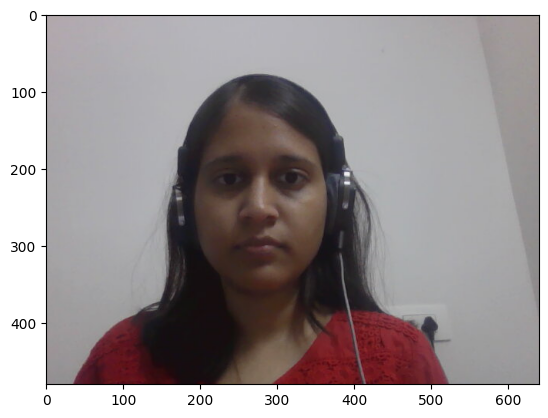

In [10]:
img = io.imread("./Images/front_shruti.jpg")
plt.imshow(img)
plt.show()

In [13]:
# draw an image with detected objects
def draw_facebox(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    print("\n")
    for result in result_list:
        print("Output from MTCNN", result_list)
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = plt.Circle(value, radius=5, color='red')
            ax.add_patch(dot)
        # show the plot
    plt.show()

Right Angle is:  [43.72117]
Left Angle is: [48.024456]
Predicted Face profile is ['Front Face Profile']


Output from MTCNN [{'box': [185, 125, 175, 226], 'confidence': 0.9999994039535522, 'keypoints': {'left_eye': (238, 216), 'right_eye': (319, 213), 'nose': (277, 258), 'mouth_left': (248, 304), 'mouth_right': (312, 303)}}]


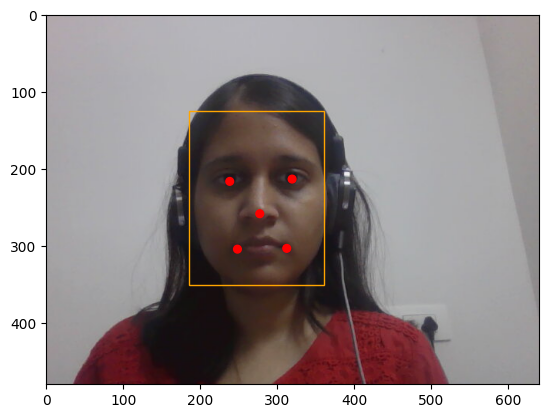

In [14]:
filename = './Images/front_shruti.jpg'
img = cv2.imread(filename)
im = imutils.resize(img, width=720)
predFacePose(im)
right, left, prediction = predFacePose(im)
print("Right Angle is: ",right)
print("Left Angle is:", left)
print("Predicted Face profile is", prediction)

# load image from file
pixels = plt.imread(filename) # defined above, otherwise uncomment
# detector is defined above, otherwise uncomment
detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_facebox(filename, faces)

In [16]:
filename = "./Images/side_1.jpg"
img = cv2.imread()
im = imutils.resize(img, width=720)
left, right, prediction = predFacePose(im)
print("Right Angle is: ",right)
print("Left Angle is:", left)
print("Predicted Face profile is", prediction)
filename = 'side_1.jpg'
# load image from file
pixels = plt.imread(filename) #
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_facebox(filename, faces)

TypeError: imread() missing required argument 'filename' (pos 1)

Right Angle is:  [92.023445]
Left Angle is: [33.335213]
Predicted Face profile is ['Left Face Profile']


Output from MTCNN [{'box': [165, 132, 158, 229], 'confidence': 0.9999974966049194, 'keypoints': {'left_eye': (181, 218), 'right_eye': (239, 216), 'nose': (176, 260), 'mouth_left': (184, 315), 'mouth_right': (227, 313)}}]


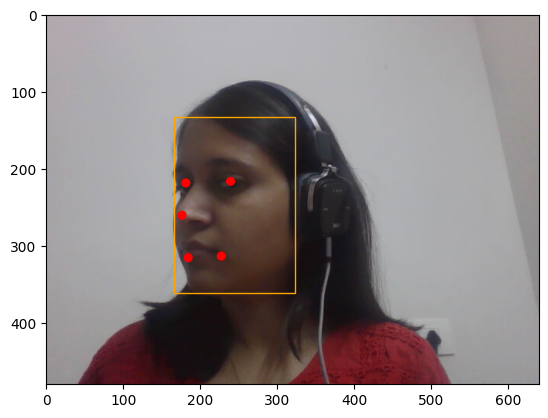

In [18]:
filename = "./Images/side_2.jpg"
img = cv2.imread(filename)
im = imutils.resize(img, width=720)
left, right, prediction = predFacePose(im)
print("Right Angle is: ",right)
print("Left Angle is:", left)
print("Predicted Face profile is", prediction)

# load image from file
pixels = plt.imread(filename) #
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_facebox(filename, faces)

In [19]:
file_name = "./Images/front_shruti.jpg"

In [20]:
import face_recognition
image = face_recognition.load_image_file(file_name)
face_locations = face_recognition.face_locations(image)

In [21]:
######################## LANDMARKS(EYEBROWS, CHIN, EYES, NOSE, LIPS ETC) NEEDED TO CORRECT THE ORIENTATION
face_landmarks_list = face_recognition.face_landmarks(image)
face_landmarks_list

[{'chin': [(188, 221),
   (188, 243),
   (191, 266),
   (195, 289),
   (203, 311),
   (217, 330),
   (235, 344),
   (256, 354),
   (280, 357),
   (302, 354),
   (323, 342),
   (340, 327),
   (353, 308),
   (360, 286),
   (363, 262),
   (365, 239),
   (366, 215)],
  'left_eyebrow': [(203, 200), (214, 188), (230, 183), (247, 183), (262, 189)],
  'right_eyebrow': [(290, 189),
   (305, 182),
   (323, 181),
   (339, 187),
   (350, 199)],
  'nose_bridge': [(277, 211), (276, 225), (276, 239), (275, 255)],
  'nose_tip': [(257, 270), (266, 272), (276, 274), (286, 272), (296, 269)],
  'left_eye': [(220, 216),
   (231, 209),
   (243, 209),
   (255, 218),
   (243, 222),
   (230, 222)],
  'right_eye': [(299, 217),
   (310, 207),
   (323, 207),
   (334, 214),
   (324, 220),
   (311, 220)],
  'top_lip': [(246, 303),
   (257, 294),
   (268, 289),
   (277, 291),
   (285, 288),
   (297, 293),
   (310, 302),
   (304, 302),
   (286, 299),
   (277, 300),
   (269, 299),
   (251, 303)],
  'bottom_lip': [(310

In [26]:
###################### FACE MATCH BETWEEN ID CARD AND FACE OF THE SAME PERSON ####################
known_image = face_recognition.load_image_file("./Images/tarento_id.png")
unknown_image = face_recognition.load_image_file("./Images/front_shruti.jpg")

shruti_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

face_distances = face_recognition.face_distance([shruti_encoding], unknown_encoding)
results = []

for i, face_distance in enumerate(face_distances):
    if face_distance < 0.6:
        results = [True]
        print("Faces are a match")
    else:
        results = [False]
        print("Faces are not a match")
print("Face distance is", face_distance)

Faces are a match
Face distance is 0.3717146400024798


In [27]:
###################### FACE MATCH OF 2 DIFFERENT PERSONS ####################
known_image = face_recognition.load_image_file("./Images/biden.jpg")
unknown_image = face_recognition.load_image_file("./Images/front_shruti.jpg")

shruti_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

face_distances = face_recognition.face_distance([shruti_encoding], unknown_encoding)
results = []

for i, face_distance in enumerate(face_distances):
    if face_distance < 0.6:
        results = [True]
        print("Faces are a match")
    else:
        results = [False]
        print("Faces are not a match")
print("Face distance is", face_distance)

Faces are not a match
Face distance is 0.8707819028909796


In [45]:
######################################
# STEPS IN FACE RECOGNITION #
######################################
import sys
import dlib
%matplotlib inline
from matplotlib import pyplot as plt

In [46]:
#####################STEP 1, (FACE DETECTION)#################################
# Create a HOG face detector using the built-in dlib class
face_detector = dlib.get_frontal_face_detector()

In [47]:
win = dlib.image_window()

In [53]:
file_name = "./Images/ayush3.jpg"
# Load the image into an array
image = io.imread(file_name)

# Run the HOG face detector on the image data.
# The result will be the bounding boxes of the faces in our image.
detected_faces = face_detector(image, 1)

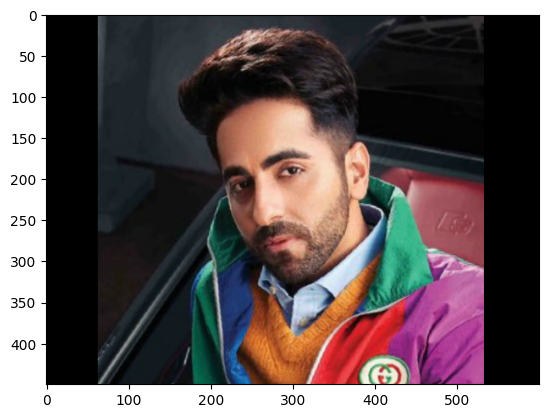

In [54]:
plt.imshow(image)
plt.show()

In [55]:
print("Found {} faces in the file {}".format(len(detected_faces), file_name))
win.set_image(image)

Found 1 faces in the file ./Images/ayush3.jpg


In [56]:
# A WINDOW WILL OPEN ON THE DESKTOP, PLEASE SEE THE OUTPUT THERE.

# Loop through each face we found in the image
for i, face_rect in enumerate(detected_faces):

	# Detected faces are returned as an object with the coordinates 
	# of the top, left, right and bottom edges
	print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i, face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))

	# Draw a box around each face we found
	win.add_overlay(face_rect)
	        
# Wait until the user hits <enter> to close the window	        
dlib.hit_enter_to_continue()

- Face #0 found at Left: 180 Top: 139 Right: 366 Bottom: 325


In [57]:
################################STEP 2, CORRECT FACE ORIENTATION ####################################
# You can download the required pre-trained face detection model here. This contains the 68 landmarks of the face.
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

In [58]:
predictor_model = "shape_predictor_68_face_landmarks.dat"
face_pose_predictor = dlib.shape_predictor(predictor_model)

In [59]:
win = dlib.image_window()

In [60]:
win.set_image(image)

# Loop through each face we found in the image
for i, face_rect in enumerate(detected_faces):
    # Detected faces are returned as an object with the coordinates 
    # of the top, left, right and bottom edges
    print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i, face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))

    # Draw a box around each face we found
    win.add_overlay(face_rect)

    # Get the the face's pose
    pose_landmarks = face_pose_predictor(image, face_rect)

    # Draw the face landmarks on the screen.
    win.add_overlay(pose_landmarks)

    dlib.hit_enter_to_continue()

- Face #0 found at Left: 180 Top: 139 Right: 366 Bottom: 325


In [ ]:
####################################STEP 3#####################################
import openface.openface.align_dlib as openface
import cv2

In [ ]:
face_aligner = openface.AlignDlib(predictor_model)

In [ ]:
# Loop through each face we found in the image
for i, face_rect in enumerate(detected_faces):

    # Detected faces are returned as an object with the coordinates 
    # of the top, left, right and bottom edges
    print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i, face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))

    # Get the the face's pose
    pose_landmarks = face_pose_predictor(image, face_rect)

    # Use openface to calculate and perform the face alignment
    alignedFace = face_aligner.align(534, image, face_rect, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)

    # Save the aligned image to a file
    cv2.imwrite("aligned_face_{}.jpg".format(i), alignedFace)

imag = cv2.imread("aligned_face_0.jpg")
plt.imshow(imag)
plt.show()